In [1]:
import sys
quic_path = '/home/quic/QUIC-Projects'
if not quic_path in sys.path:
    sys.path.append(quic_path)

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [3]:
from classifiers.kernel import Kernel

In [4]:
kernel = Kernel('Pauli', reps=1)

In [5]:
"""from qiskit import IBMQ
if IBMQ.active_account() is None:
    IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-kaist', group='internal', project='default')
backend = provider.get_backend('ibmq_qasm_simulator')
backend"""

"from qiskit import IBMQ\nif IBMQ.active_account() is None:\n    IBMQ.load_account()\nprovider = IBMQ.get_provider(hub='ibm-q-kaist', group='internal', project='default')\nbackend = provider.get_backend('ibmq_qasm_simulator')\nbackend"

In [6]:
from qiskit.circuit.library import PauliFeatureMap
PauliFeatureMap(2, reps=1).draw()

┌───┐┌─────────────┐                                          
q_0: ┤ H ├┤ P(2.0*x[0]) ├──■────────────────────────────────────■──
     ├───┤├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐
q_1: ┤ H ├┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├
     └───┘└─────────────┘└───┘└──────────────────────────────┘└───┘

In [7]:
from classifiers.convex.svm import BinarySVM

In [8]:
svm = BinarySVM(kernel, C=None, k=10, mutation='REDUCED_QASVM')

In [9]:
from classifiers.datasets.dataloader import Sklearn_DataLoader
from classifiers.datasets.datascaler import DataScaler

In [10]:
np.random.seed(13)
dl = Sklearn_DataLoader('iris', labels=(1, 2))
X, y, Xt, yt = dl(8, true_hot=0)

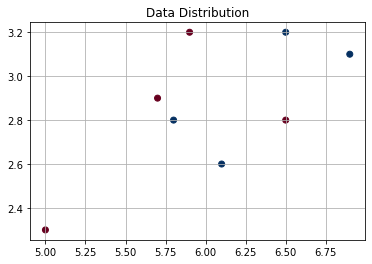

In [11]:
from classifiers.visualization import Plot_Data, Plot_SVM
Plot_Data(X, y).plot()

In [ ]:
svm.fit(X, y)
plt.plot(svm.f(X))

In [ ]:
svm.f(X)

In [ ]:
plt.plot(svm.f(X)*svm.polary)
plt.hlines(0, 0, 7)

In [ ]:
from classifiers.quantum.qasvm import QASVM
from qiskit.circuit.library import RealAmplitudes, PauliFeatureMap


In [ ]:
feature_map = PauliFeatureMap(4, reps=1)
var_form = RealAmplitudes(3, reps=16)

In [ ]:
from qiskit.utils import QuantumInstance

In [ ]:
from qiskit.providers.aer import AerSimulator
sim_gpu = AerSimulator(method='automatic', device='CPU')
quantum_instance = QuantumInstance(sim_gpu, shots=2**13)

In [ ]:
qasvm = QASVM(X, y, num_data_qubits=4, var_form=var_form, quantum_instance = quantum_instance, feature_map = feature_map, C=None, k=10, option='QASVM', initial_point=np.ones(9)).dual

In [ ]:
qasvm.first_order_circuit.draw(fold=-1)

In [ ]:
print(qasvm.second_order_circuit.depth())

In [ ]:
import time
start = time.time()

In [ ]:
from classifiers.optimizer import SPSA
optimizer = SPSA(qasvm, blocking=True)


In [ ]:
from classifiers.callback import CostParamStorage
storage = CostParamStorage(interval=1)


In [ ]:
from tqdm.notebook import tqdm

epochs = 2**10
last_avg = 2**4

for epoch in tqdm(range(epochs)):
    optimizer.step(storage)
    if epoch>=last_avg and storage.data[-last_avg:]['Cost'].std()<optimizer.allowed_increase/2:
        break

qasvm.parameters = storage.last_avg(last_avg)

In [ ]:
from classifiers.visualization import compare_svm_and_qasvm

In [ ]:
l = compare_svm_and_qasvm(svm, qasvm)

In [ ]:
end = time.time()
print((end-start)/3600)

In [ ]:
l

In [ ]:
storage.plot()

In [ ]:
storage.plot_params()

In [ ]:
import qiskit
qiskit.__qiskit_version__

In [ ]:
0.146*60

In [ ]:
print((end-start)/60)

In [ ]:
storage.data

In [ ]:
storage.data[-last_avg:]['Cost'].std() 

In [ ]:
storage.data = storage.data[storage.data['Accepted']==True]

In [ ]:
storage.plot()

In [ ]:
storage.data[-last_avg:]['Cost'].std()

In [ ]:
optimizer.allowed_increase

In [ ]:
np.save('./l', l)

In [ ]:
del l

In [ ]:
l =np.load('./l.npy')

In [ ]:
l